In [1]:
%matplotlib inline
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from jubatus import Regression
from jubatus.common import Datum

/home/daats/.pyenv/versions/3.6.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def train_and_estimate(data):
    # 回帰クライアントの起動
    regression = Regression('127.0.0.1', 9199, "")
    regression.clear()

    # 学習用データサイズを設定
    n_train = int(len(data)*0.9)

    # 可視化用
    answer = []
    prediction = []
    index = df.index[1:]

    for i in range(len(data)-1):
        # 1期前のデータを入力にして、現在の値を予測する
        y_true = float(data[i+1]) 

        if i > n_train:
            x = Datum({"data": prediction[-1]})
            y_pred = regression.estimate([Datum({"data": prediction[-1]})])[0]  # 予測する
            prediction.append(y_pred)
        else:
            x = Datum({"data": data[i]})
            regression.train([[y_true, x]])  # 学習する
            prediction.append(y_true)  # 可視化用に保存する

        # 現在の値を取得できたので、学習を行う

        # 可視化用に結果を保存
        answer.append(y_true)

    # RMSEを計算
    rmse = np.sqrt(mean_squared_error(answer[n_train:], prediction[n_train:]))

    # 可視化
    df_result = pd.DataFrame({"answer": answer, "predict": prediction}, index=index)
    df_result.plot(figsize=(18,12), title="RMSE={0:.3f}".format(rmse))

### ノッティンガムの平均気温

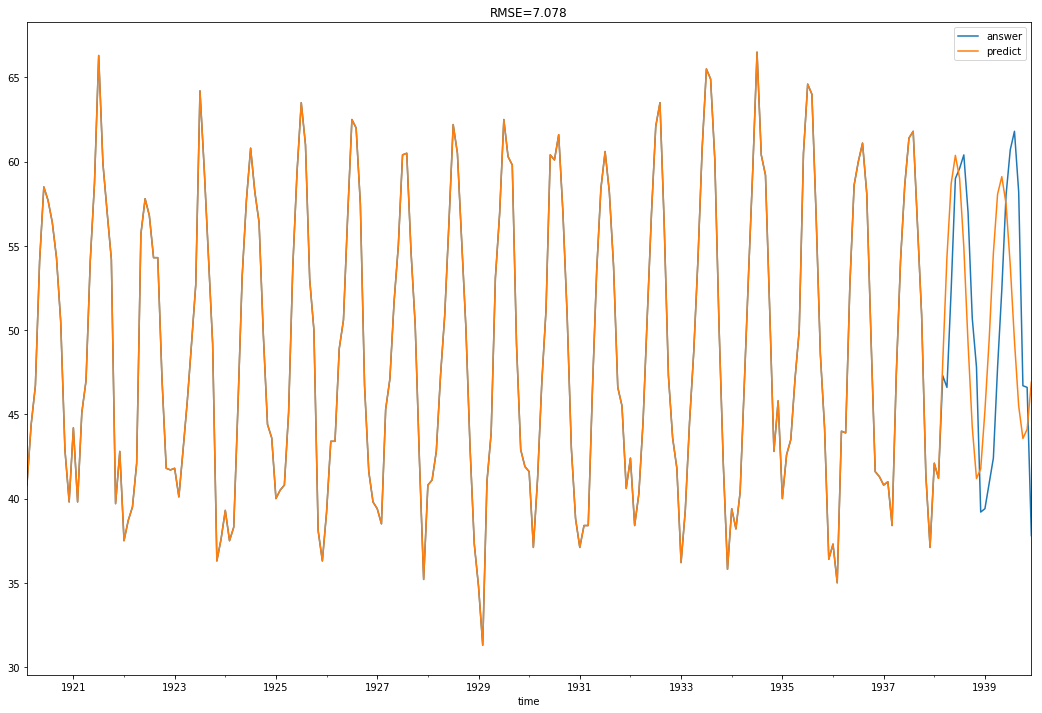

In [4]:
# データセットの取得
target = 'nottem'
df = sm.datasets.get_rdataset(target).data
def convert_date(date):
    month, year = math.modf(float(date))
    year = round(year)
    month = round(month / (1.0 / 12) + 1)
    return datetime.datetime(int(year), int(month), 1)
df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df[target] = df[target].astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df[target].as_matrix().tolist()

# 学習と予測
train_and_estimate(data)

### 太陽黒点

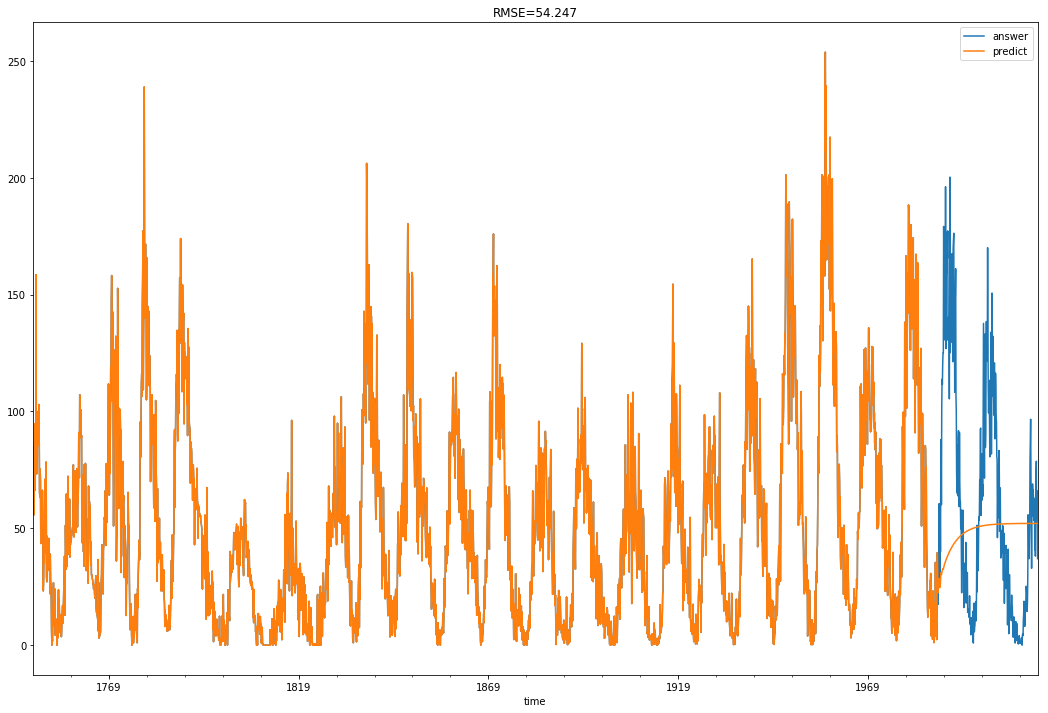

In [5]:
# データセットの取得
target = 'sunspot.month'
df = sm.datasets.get_rdataset(target).data
# 日付変換 + 整形
def convert_date(date):
    month, year = math.modf(float(date))
    year = round(year)
    month = round(month / (1.0 / 12) + 1)
    return datetime.datetime(int(year), int(month), 1)

df.time = df.time.apply(convert_date)
df.index = pd.to_datetime(df.time, format='%Y')
df[target] = df[target].astype(float)
df = df.drop('time', axis=1)

# pandas形式をlistに変換する
data = df[target].as_matrix().tolist()

# 学習と予測
train_and_estimate(data)